Mobile Data Usage and User Behvaiour

For the project i will be using the CRSP-DM Process to be able to analyse this Data set. This data set is looking at mobile data usage and and user behaviour. Below is the CRSP-DM Process:

1 BUSINESS UNDERSTANDING (understanding the problem and questions to be tackled)

2 DATA UNDERSTANDING (moving the questions to data)

3 DATA PREPARATION (Wrangling and cleaning the data)

4 DATA MODELING


Business Understanding 

I want to undestand the following; 

Does you Age impact your screen time?
Is there a relationship between your gender or the device you use and screen time?
What can help indicate screen time?


Data Understanding 

I will be analysising the data, to understand the size, what the data is showing, any weeknesses in the data etc. 

In [237]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./user_behavior_dataset.csv')
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [238]:
df.shape


(700, 11)

In [239]:
#I can see the size of the data, 700 rows and 11 columns. 
# This is a reasonable size dataset to make an analysis (although it is not a large dataset)

In [240]:
df.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


In [241]:
#Max screen time (hours/day) is 12. The age ranges from 18 to 59.
#Number of apps installed ranges from 10 to 99.


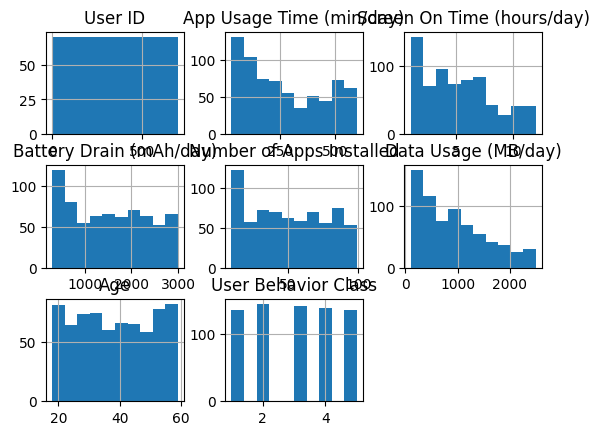

In [242]:
df.hist();

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [ ]:
#Having a look at the data, i can see the the types look reasonable, which means for now there is no need to make any changes to the type.

Age and Device Model Analysis

In [245]:
df["Device Model"].unique()

array(['Google Pixel 5', 'OnePlus 9', 'Xiaomi Mi 11', 'iPhone 12',
       'Samsung Galaxy S21'], dtype=object)

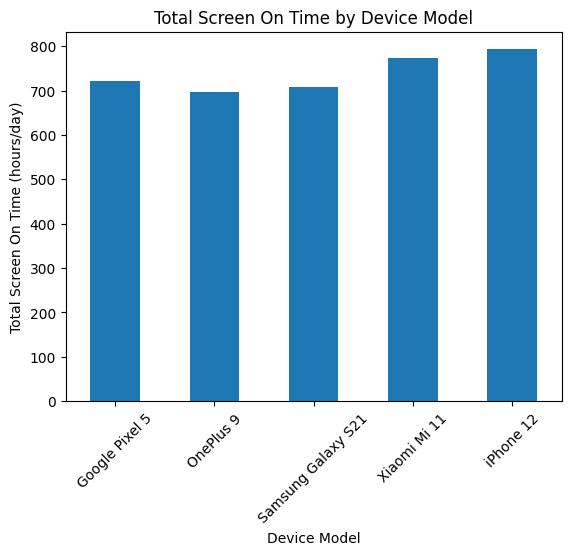

In [246]:
device_screen_time = df.groupby("Device Model")["Screen On Time (hours/day)"].sum()

# Plot the bar chart
fig, ax = plt.subplots()
device_screen_time.plot(kind="bar", ax=ax)
ax.set_xlabel("Device Model")  # Set x-axis label
ax.set_ylabel("Total Screen On Time (hours/day)")  # Set y-axis label
plt.title("Total Screen On Time by Device Model")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

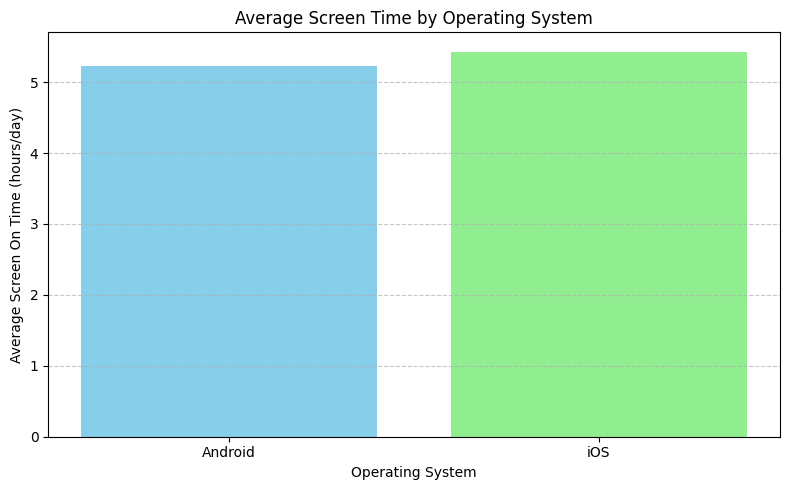

In [265]:
# Group by operating system and calculate the average screen time
screen_time_by_os = df.groupby("Operating System")["Screen On Time (hours/day)"].mean()

# Plot the bar chart
plt.figure(figsize=(8, 5))
plt.bar(screen_time_by_os.index, screen_time_by_os, color=["skyblue", "lightgreen"])
plt.title("Average Screen Time by Operating System")
plt.xlabel("Operating System")
plt.ylabel("Average Screen On Time (hours/day)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

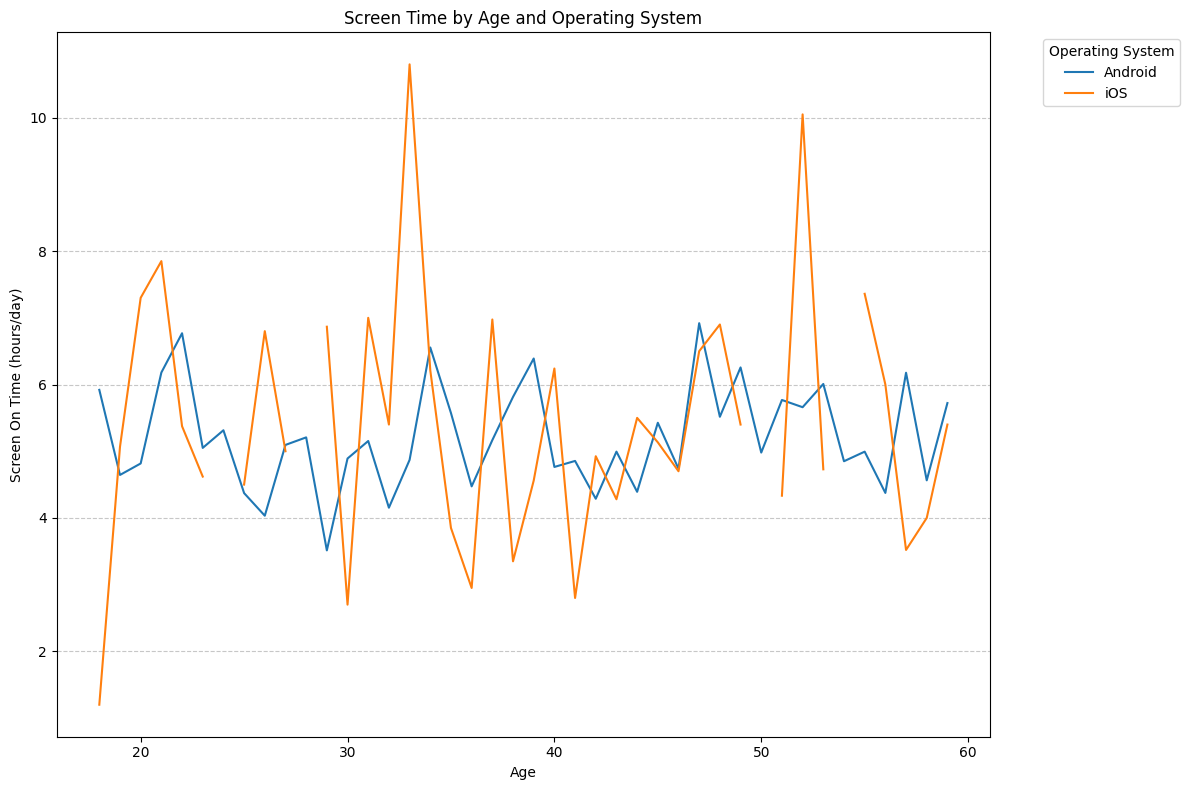

In [267]:
# Group by Operating System and Age, calculate the average screen time
grouped_data = df.groupby(["Operating System", "Age"])["Screen On Time (hours/day)"].mean().unstack(level=0)

# Plot the line graph
plt.figure(figsize=(12, 8))
for os in grouped_data.columns:
    plt.plot(grouped_data.index, grouped_data[os], label=os)

# Add title and labels
plt.title("Screen Time by Age and Operating System")
plt.xlabel("Age")
plt.ylabel("Screen On Time (hours/day)")
plt.legend(title="Operating System", bbox_to_anchor=(1.05, 1), loc="upper left")  # Legend outside the plot
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

plt.show()

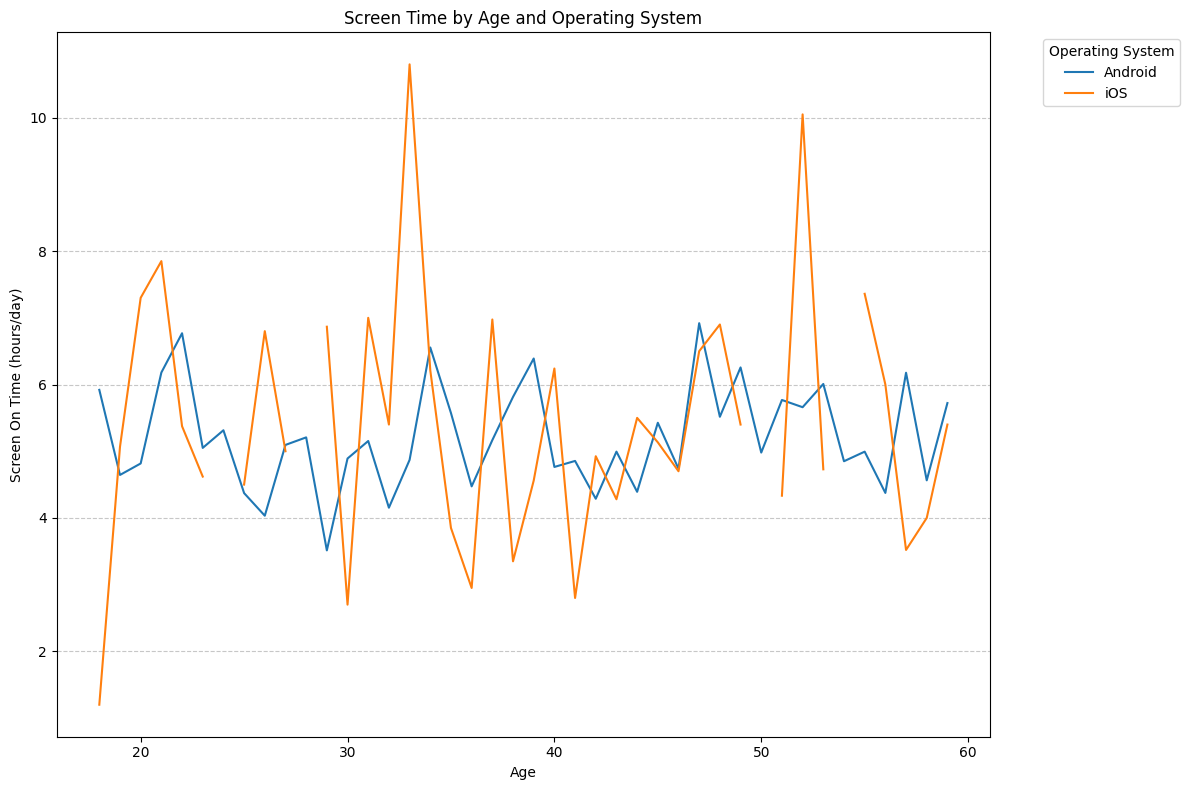

In [269]:

# Group by Operating System and Age, calculate the average screen time
grouped_data = df.groupby(["Operating System", "Age"])["Screen On Time (hours/day)"].mean().unstack(level=0)

# Plot the line graph
plt.figure(figsize=(12, 8))
for os in grouped_data.columns:
    plt.plot(grouped_data.index, grouped_data[os], label=os)

# Add title and labels
plt.title("Screen Time by Age and Operating System")
plt.xlabel("Age")
plt.ylabel("Screen On Time (hours/day)")
plt.legend(title="Operating System", bbox_to_anchor=(1.05, 1), loc="upper left")  # Legend outside the plot
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

plt.show()

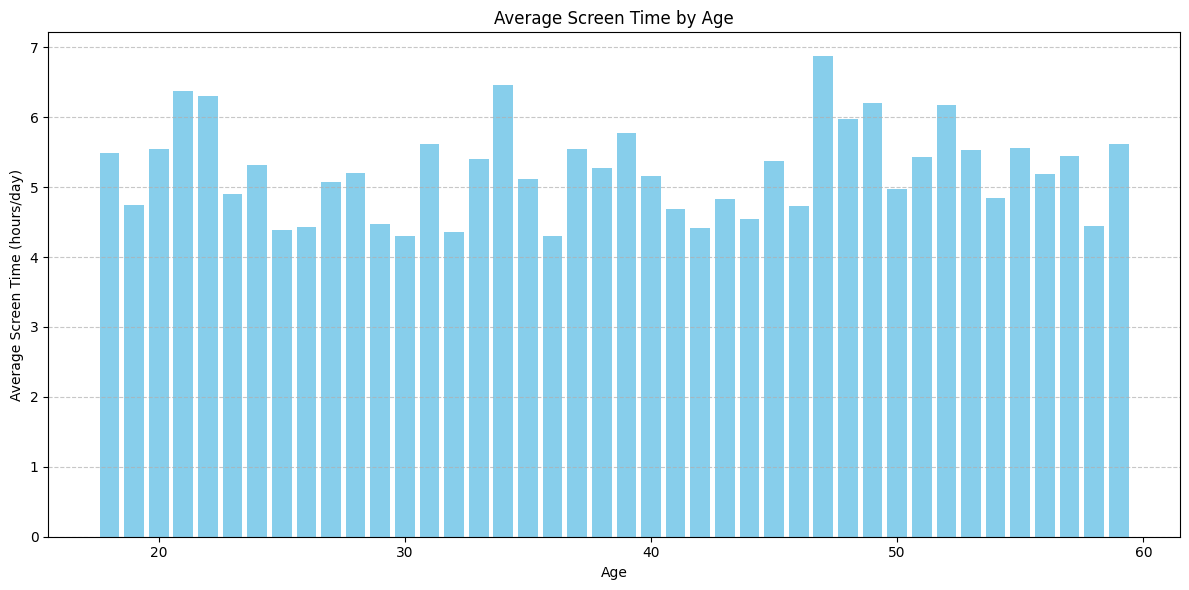

In [275]:
# Group by age and calculate the average screen time for each age
screen_time_by_age = df.groupby("Age")["Screen On Time (hours/day)"].mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(screen_time_by_age.index, screen_time_by_age, color="skyblue")
plt.title("Average Screen Time by Age")
plt.xlabel("Age")
plt.ylabel("Average Screen Time (hours/day)")
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: Add a grid for readability
plt.tight_layout()

plt.show()

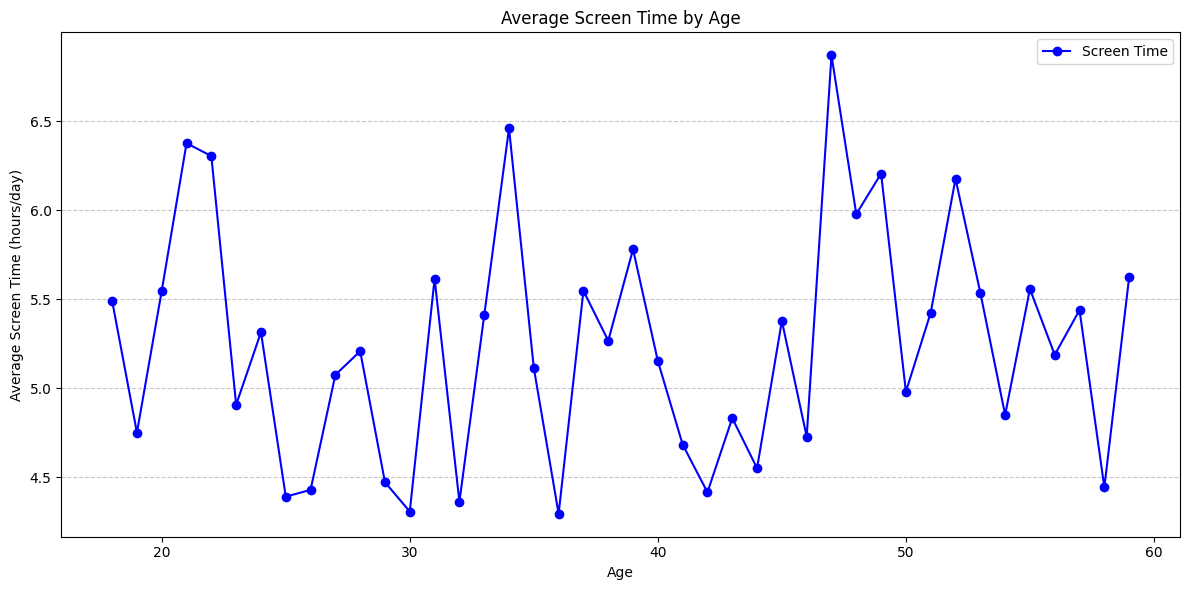

In [ ]:
# line graph to visual average screen by age in a better way
plt.figure(figsize=(12, 6))
plt.plot(screen_time_by_age.index, screen_time_by_age, color="blue", marker="o", label="Screen Time")
plt.title("Average Screen Time by Age")
plt.xlabel("Age")
plt.ylabel("Average Screen Time (hours/day)")
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.legend()
plt.tight_layout()

plt.show()

C:\Users\cmezu\AppData\Local\Temp\ipykernel_12440\809110215.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  screen_time_by_age_group = df.groupby("Age Group")["Screen On Time (hours/day)"].mean()


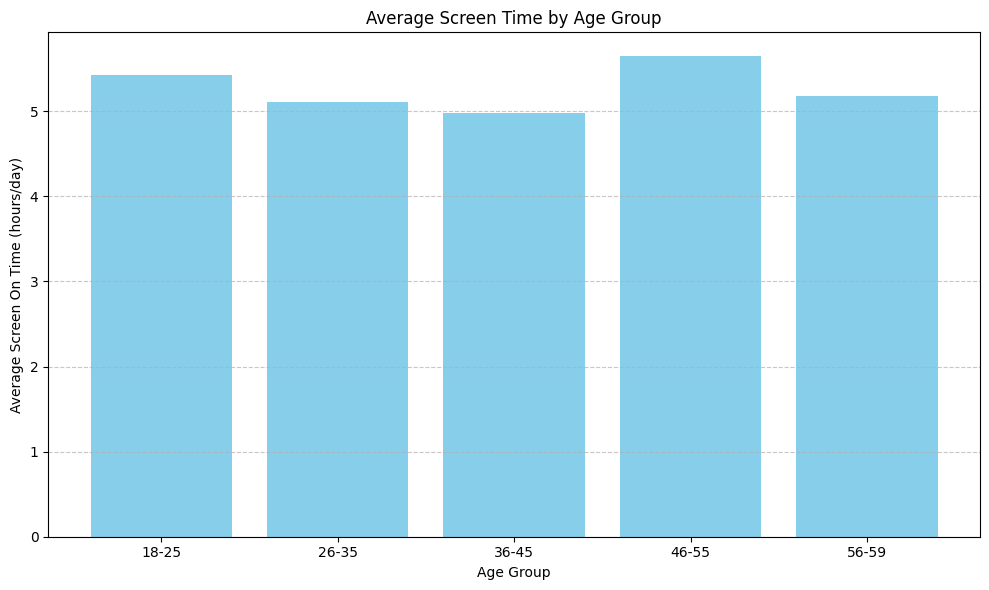

In [250]:
# Define age bins and labels
age_bins = [18, 25, 35, 45, 55, 60]  # Define the bin edges
age_labels = ["18-25", "26-35", "36-45", "46-55", "56-59"]  # Define labels for the bins

# Create a new column for age groups
df["Age Group"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels, right=True)

# Group by age group and calculate average screen time
screen_time_by_age_group = df.groupby("Age Group")["Screen On Time (hours/day)"].mean()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(screen_time_by_age_group.index, screen_time_by_age_group, color="skyblue")
plt.title("Average Screen Time by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Screen On Time (hours/day)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

<Figure size 1000x600 with 0 Axes>

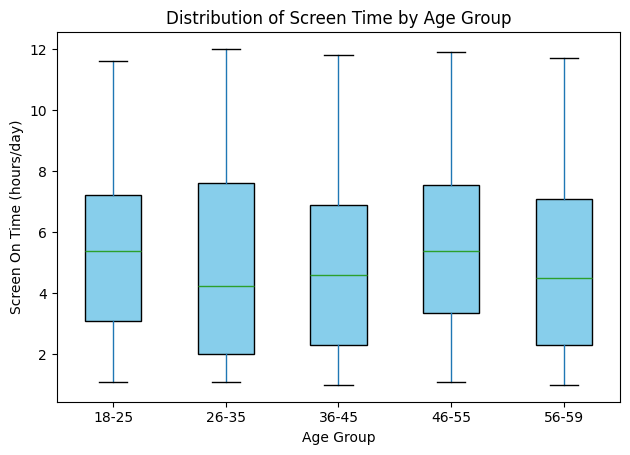

In [272]:


# Create a new column for age groups (if not already created)
df["Age Group"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels, right=True)

# Plotting the box plot
plt.figure(figsize=(10, 6))
df.boxplot(column="Screen On Time (hours/day)", by="Age Group", grid=False, patch_artist=True, boxprops=dict(facecolor="skyblue"))
plt.title("Distribution of Screen Time by Age Group")
plt.suptitle("")  # Removes the default "Boxplot grouped by Age Group" title
plt.xlabel("Age Group")
plt.ylabel("Screen On Time (hours/day)")
plt.tight_layout()

plt.show()

  Age Group  Number of People
0     18-25               110
1     26-35               182
2     36-45               162
3     46-55               164
4     56-59                82


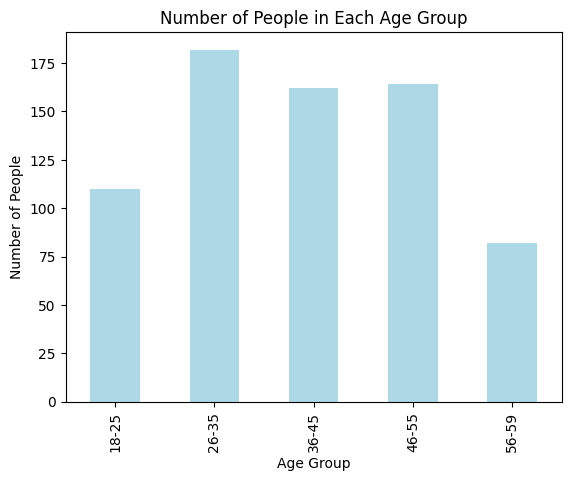

In [273]:


# Create a new column for age groups
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Count the number of people in each age group
age_group_counts = df['Age Group'].value_counts().sort_index()

# Display the counts as a table
age_group_counts_table = pd.DataFrame(age_group_counts).reset_index()
age_group_counts_table.columns = ['Age Group', 'Number of People']

# Show the table
print(age_group_counts_table)

# Plot the histogram (optional)
fig, ax = plt.subplots()
age_group_counts.plot(kind="bar", ax=ax, color="lightblue")
ax.set_title("Number of People in Each Age Group")
ax.set_xlabel("Age Group")
ax.set_ylabel("Number of People")
plt.show()

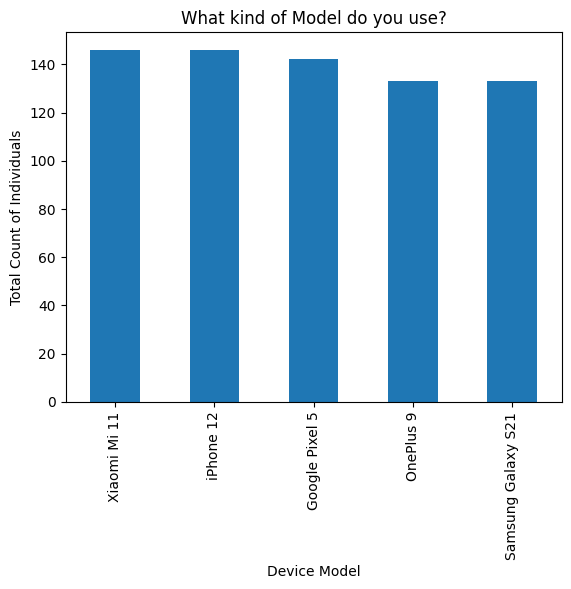

In [253]:
# Calculate the counts for each device model
status_vals = df["Device Model"].value_counts()  # Count occurrences of each device model

# Plot the total count of individuals using each model
status_vals.plot(kind="bar")
plt.title("What kind of Model do you use?")
plt.xlabel("Device Model")
plt.ylabel("Total Count of Individuals")
plt.show()

In [254]:
# Calculate the counts for each device model
status_vals = df["Device Model"].value_counts()  # Count occurrences of each device model

# Convert to DataFrame and reset the index to make it a table
status_table = status_vals.reset_index()
status_table.columns = ["Device Model", "Total Count"]  # Rename columns for clarity

# Display the table
print(status_table)

         Device Model  Total Count
0        Xiaomi Mi 11          146
1           iPhone 12          146
2      Google Pixel 5          142
3           OnePlus 9          133
4  Samsung Galaxy S21          133


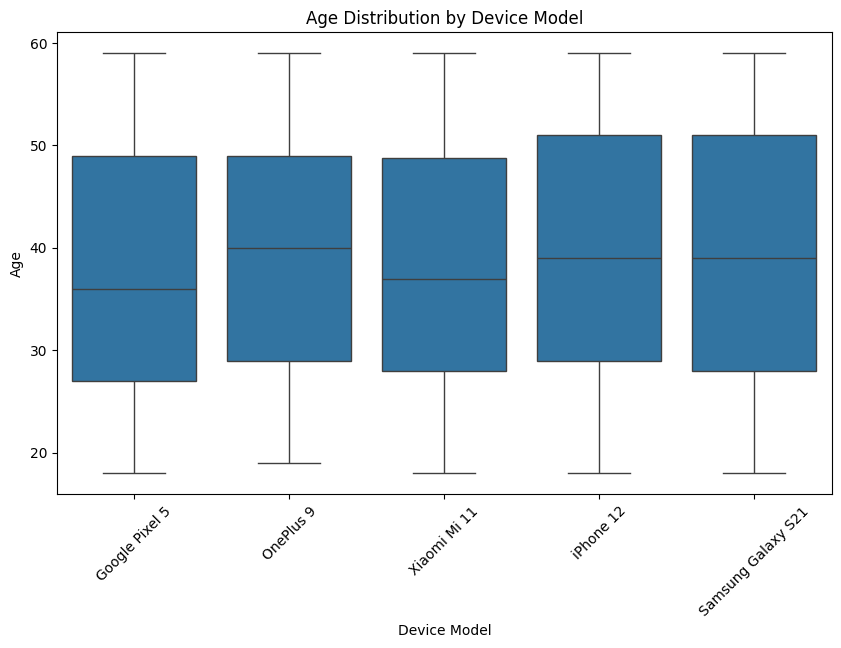

In [ ]:
# A box plot of Age by Device Model
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Device Model", y="Age")
plt.title("Age Distribution by Device Model")
plt.xlabel("Device Model")
plt.ylabel("Age")
plt.xticks(rotation=45)  
plt.show()

In [ ]:
#Analysis summary so far
#Most users have either a Xiaomi Mi 11 or a iPhone 12
#Data usage on average is higher for iPhone 12 
#Data usage on average is higest for Age 45-55
#majority of users in this dataset are age group 26-35

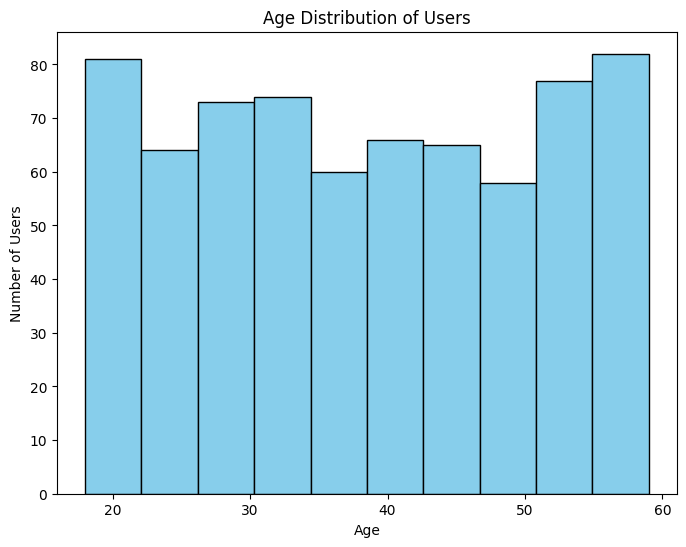

In [ ]:
# Histogram 
plt.figure(figsize=(8, 6))
plt.hist(df["Age"], bins=10, color="skyblue", edgecolor="black")
plt.title("Age Distribution of Users")
plt.xlabel("Age")
plt.ylabel("Number of Users")
plt.show()

Gender Analysis

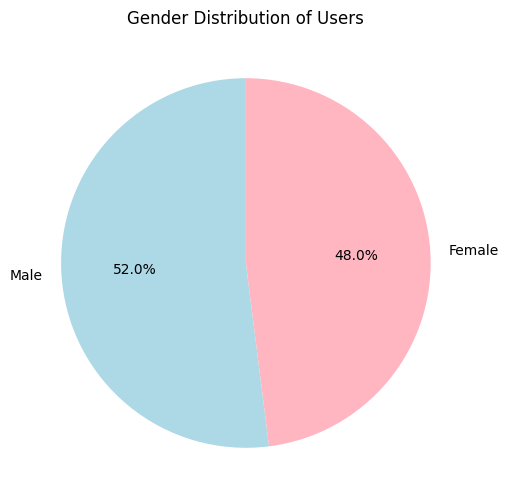

In [258]:
# Plot the gender distribution as a pie chart
plt.figure(figsize=(6, 6))
gender_counts = df["Gender"].value_counts()
gender_counts.plot(kind="pie", autopct="%1.1f%%", startangle=90, colors=["lightblue", "lightpink"])
plt.title("Gender Distribution of Users")
plt.ylabel("")  # Hide the default y-label for a cleaner look
plt.show()

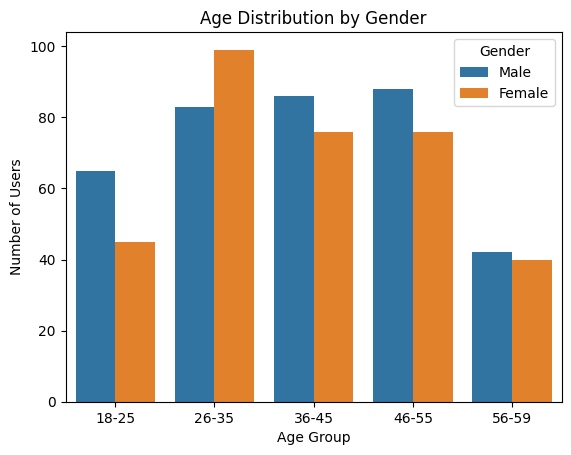

In [259]:
# Age distribution by gender (split by gender)
sns.countplot(data=df, x="Age Group", hue="Gender")
plt.title("Age Distribution by Gender")
plt.xlabel("Age Group")
plt.ylabel("Number of Users")
plt.show()

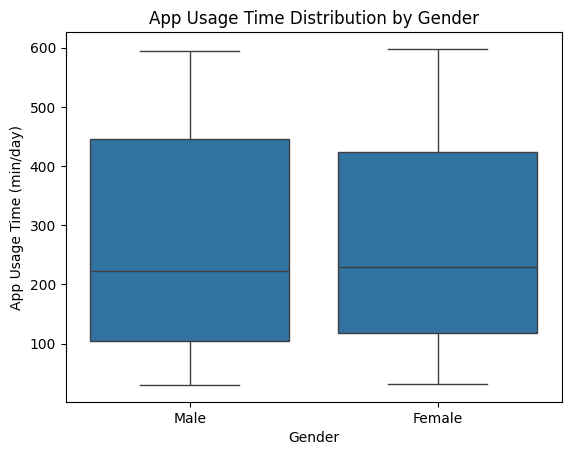

In [260]:
sns.boxplot(data=df, x="Gender", y="App Usage Time (min/day)")
plt.title("App Usage Time Distribution by Gender")
plt.show()

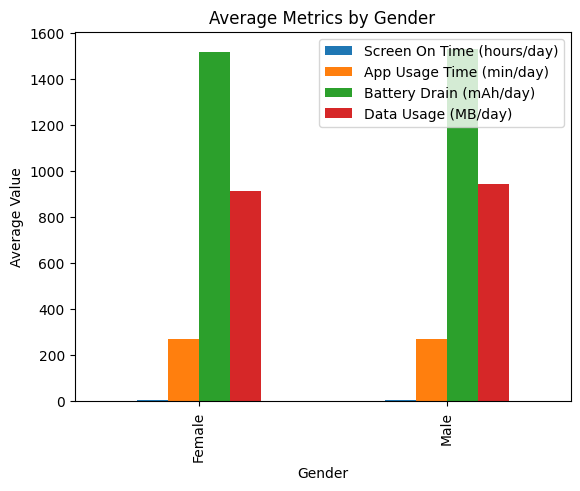

In [261]:
df.groupby("Gender")[["Screen On Time (hours/day)", "App Usage Time (min/day)", "Battery Drain (mAh/day)", "Data Usage (MB/day)"]].mean().plot(kind="bar")
plt.title("Average Metrics by Gender")
plt.ylabel("Average Value")
plt.show()

<Figure size 800x500 with 0 Axes>

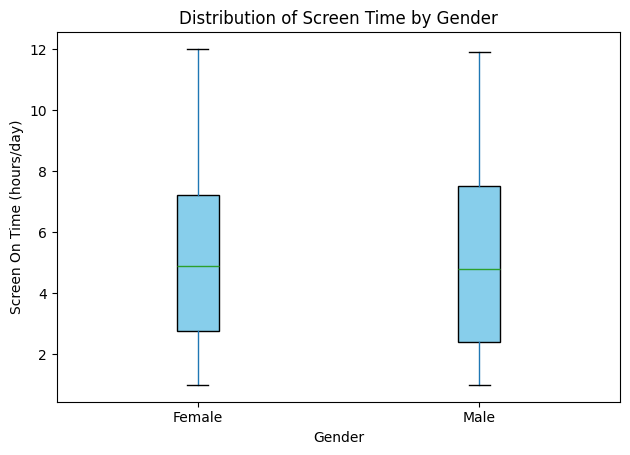

In [262]:
# Box plot
plt.figure(figsize=(8, 5))
df.boxplot(column="Screen On Time (hours/day)", by="Gender", grid=False, patch_artist=True,
           boxprops=dict(facecolor="skyblue"))
plt.title("Distribution of Screen Time by Gender")
plt.suptitle("")  # Removes the default title
plt.xlabel("Gender")
plt.ylabel("Screen On Time (hours/day)")
plt.tight_layout()

plt.show()

Screen time analysis

In [264]:
# Calculate the average screen time
average_screen_time = df["Screen On Time (hours/day)"].mean()

# Print the result
print(f"The average screen time across the dataset is {average_screen_time:.2f} hours/day.")


The average screen time across the dataset is 5.27 hours/day.


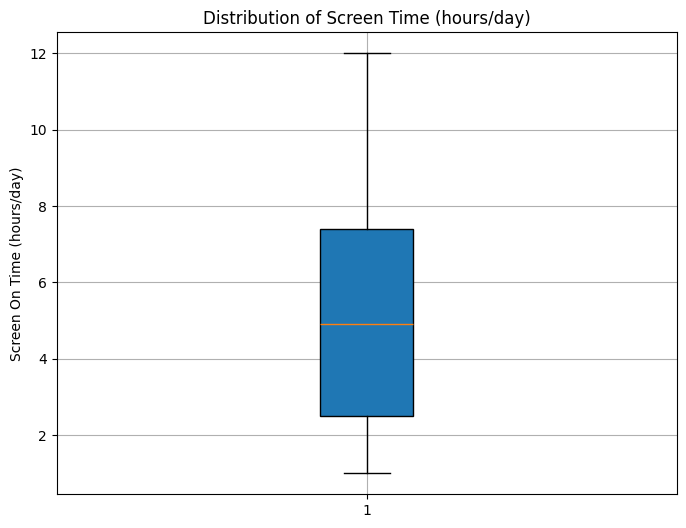

In [ ]:
# Sort the data by User ID to ensure consistent order
# Plotting
plt.figure(figsize=(8, 6))
plt.boxplot(df["Screen On Time (hours/day)"], vert=True, patch_artist=True)
plt.title("Distribution of Screen Time (hours/day)")
plt.ylabel("Screen On Time (hours/day)")
plt.grid(True)  # Optional, for readability

plt.show()

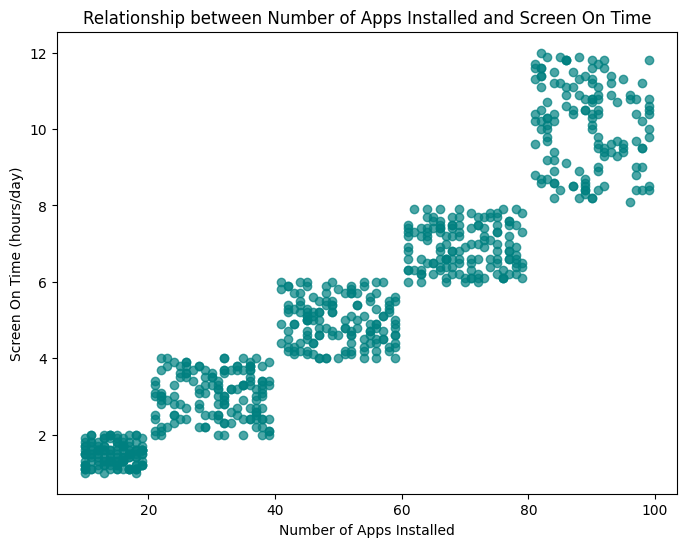

In [ ]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df["Number of Apps Installed"], df["Screen On Time (hours/day)"], color="teal", alpha=0.7)
plt.title("Relationship between Number of Apps Installed and Screen On Time")
plt.xlabel("Number of Apps Installed")
plt.ylabel("Screen On Time (hours/day)")
plt.show()

3. Data Processing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   User ID                     700 non-null    int64   
 1   Device Model                700 non-null    object  
 2   Operating System            700 non-null    object  
 3   App Usage Time (min/day)    700 non-null    int64   
 4   Screen On Time (hours/day)  700 non-null    float64 
 5   Battery Drain (mAh/day)     700 non-null    int64   
 6   Number of Apps Installed    700 non-null    int64   
 7   Data Usage (MB/day)         700 non-null    int64   
 8   Age                         700 non-null    int64   
 9   Gender                      700 non-null    object  
 10  User Behavior Class         700 non-null    int64   
 11  Age Group                   700 non-null    category
dtypes: category(1), float64(1), int64(7), object(3)
memory usage: 61.2+ KB


In [ ]:
df.isnull()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,Age Group
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
695,False,False,False,False,False,False,False,False,False,False,False,False
696,False,False,False,False,False,False,False,False,False,False,False,False
697,False,False,False,False,False,False,False,False,False,False,False,False
698,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
Age Group                     0
dtype: int64

In [ ]:
#there are no missing values in this data set

Data Modelling

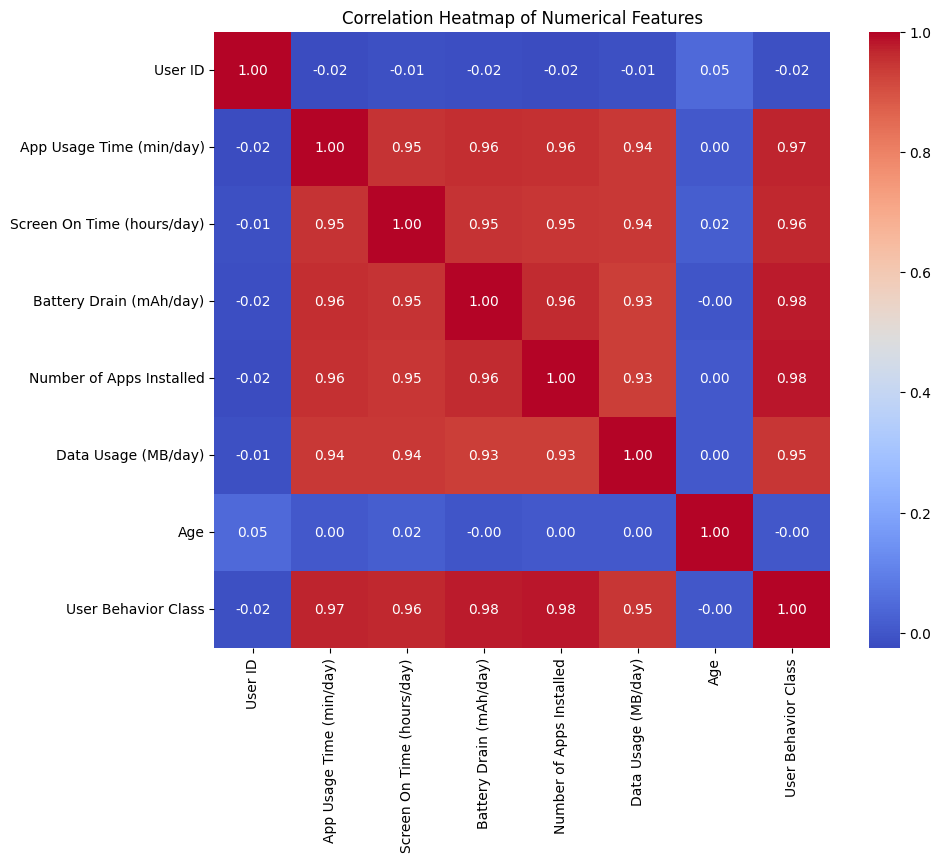

In [ ]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [ ]:
#App usage time, screen on time, battery drain, number of apps installed, data usage and user behaviour class,
#all seem to have a stong positive correlation -
#  as one increase the other tends to increase as well
#this doesn't seem suprising 
#there looks to be no relationship between user id and age when looking at user behaviour
#age is suprising due to wider reasearch was thinking there may be a relationship there 

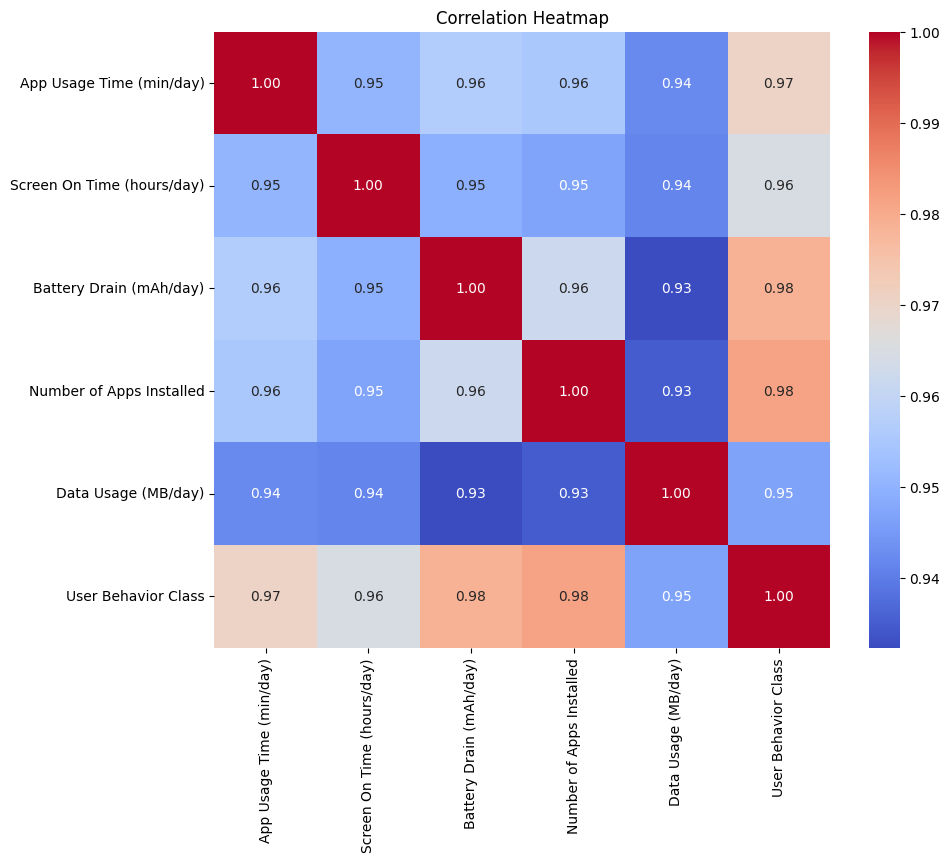

In [271]:
# Select numeric columns and exclude 'Age' and 'User ID'
numeric_df = df.select_dtypes(include=['number']).drop(columns=["Age", "User ID"])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
#i want to see if the other categorical columns have a relationship
#user id is not useful so will keep it out

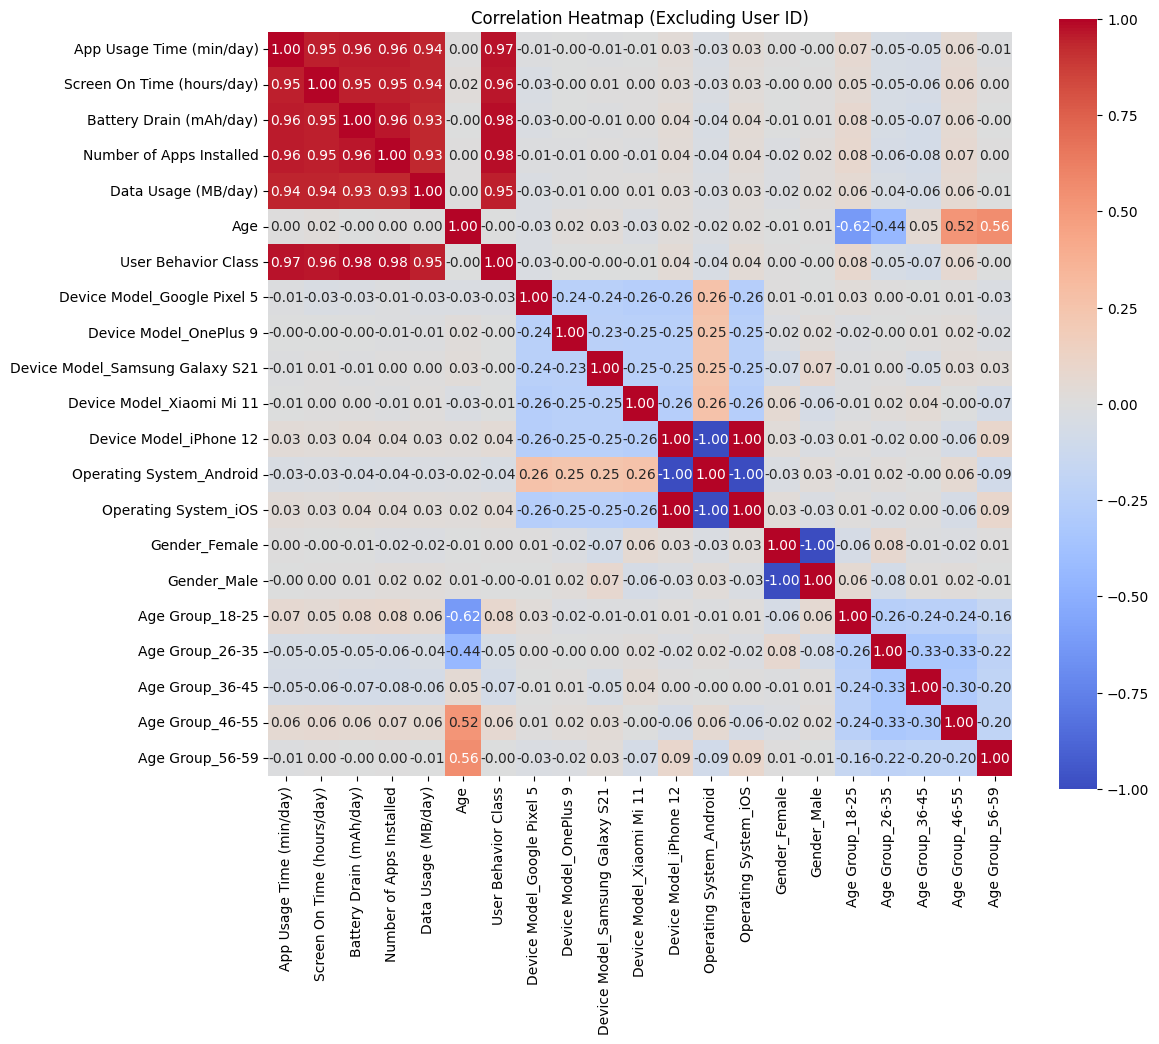

In [ ]:
# Drop the "User ID" column and apply one-hot encoding to the remaining categorical columns
df_encoded = pd.get_dummies(df.drop(columns=["User ID"]), drop_first=False)

# Calculate the correlation matrix for the DataFrame without "User ID"
correlation_matrix = df_encoded.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Heatmap (Excluding User ID)")
plt.show()

In [ ]:
#I wanted to be able to understand if there is a relationship between the categorical data and the numberical data
#I am not seeing any strong relationships

Data Modelling 2 

In [ ]:
#predict screen time

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:


# Drop "User ID" and one-hot encode categorical variables
df = df.drop(columns=["User ID"])
df = pd.get_dummies(df, drop_first=True) #i put true here because i wanted to reduce the chance of multicollinearity, although i have used false in this workbook

# Define features and target variable
X = df.drop(columns=["Screen On Time (hours/day)"])
y = df["Screen On Time (hours/day)"]

# Split the data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Feature Importance
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances}).sort_values(by="Importance", ascending=False)
print(importance_df)


Mean Absolute Error: 0.6036999999999998
Mean Squared Error: 0.5781358857142852
R-squared: 0.9355652694684327
                            Feature  Importance
1           Battery Drain (mAh/day)    0.286336
0          App Usage Time (min/day)    0.240582
2          Number of Apps Installed    0.189994
3               Data Usage (MB/day)    0.184960
5               User Behavior Class    0.085039
4                               Age    0.006886
11                      Gender_Male    0.001028
7   Device Model_Samsung Galaxy S21    0.000760
13                  Age Group_36-45    0.000732
8         Device Model_Xiaomi Mi 11    0.000704
6            Device Model_OnePlus 9    0.000672
14                  Age Group_46-55    0.000647
10             Operating System_iOS    0.000530
12                  Age Group_26-35    0.000505
9            Device Model_iPhone 12    0.000459
15                  Age Group_56-59    0.000166


In [ ]:
#Battery drain and app usage time are the most influentials and look to have the strongest relatioship to screen time 
    #this seems to makes sense as the more you use you phone the more likely to use more battery
    #also the more time you are on the phone the more you likely to be spending time on apps
#Data usage and number of apps installed have substantial importance and so contribute significantly to predicting screen time
    #this makes sense in the sense that spending more time on you phone increases you chances of data usage
    #also you may want more apps 
#user bahaviour class has moderate impact
#age and gender have low importance 
    